In [67]:
import pandas as pd
import seaborn as sns
import cdt
import networkx as nx
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## EDA Conclusions

#### Session data summary:

count    10000.000000 \
mean        16.788000  \
std          3.808321 \
min         10.000000 \
25%         13.000000 \
50%         20.000000 \
75%         20.000000 \
max         20.000000 

#### Songs data
Unique songs = 167880
Skipped songs = 33.29%

### Skip Analysis
Relation between the skips \
if skip_1 == True then skip_2 = True \
if skip_2 == True then skip_3 = True 

<!-- except for track_id_clean = t_32ef9f23-ba4f-4804-b12f-0fd660cc9f19 -->

Of the songs skipped, 50% of the songs were skipped very briefly, 25% skipped briefly, 25% most track played

#### Skip data vs Discrete features
Session position:\
skip_1 = \
skip_2 = \
skip_3 = 

Hour of the day:\
skip_1 = sharp decline rapidly after 10\
skip_2 = \
skip_3 = 

In [68]:
# read data
df = pd.read_csv('../../data/training_set/log_mini.csv')

In [69]:
df.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [70]:
# session data summary
df.session_id.value_counts().describe()

count    10000.000000
mean        16.788000
std          3.808321
min         10.000000
25%         13.000000
50%         20.000000
75%         20.000000
max         20.000000
Name: session_id, dtype: float64

In [71]:
# song data
print(f'Total number of songs:', len(df))
skipped_num = df[df['not_skipped'] == True]['not_skipped'].count()
non_skipped_num = df[df['not_skipped'] == False]['not_skipped'].count()
skip_percent = (skipped_num/(non_skipped_num + skipped_num))*100
print('Skipped percent: ', skip_percent)

Total number of songs: 167880
Skipped percent:  33.28806290207291


In [72]:
# skip 1, skip 2, skip 3 relation
df[df['skip_1'] == True]['skip_2'].describe()
df[df['skip_2'] == True]['skip_3'].describe()

count     86824
unique        2
top        True
freq      86823
Name: skip_3, dtype: object

In [73]:
df[df['skip_3'] == True]['skip_2'].describe()

count     108850
unique         2
top         True
freq       86823
Name: skip_2, dtype: object

In [74]:
# skip distributions
# songs that have been skipped

# has skipped songs
# df['is_skip'] = df.apply(lambda x : x.skip_1 or x.skip_2 or x.skip_3, axis=1)
# skipped_df = df[df['is_skip'] == True]
skipped_df = df

# add skip column
def f(s1, s2, s3):
    if s1:
        return 1
    elif s2:
        return 2
    elif s3:
        return 3
    return 0
    
skipped_df['skip'] = skipped_df.apply(lambda x: f(x.skip_1, x.skip_2, x.skip_3), axis=1)
print(skipped_df['skip'].value_counts())
skipped_df['skip'].describe()

1    70762
0    59029
3    22027
2    16062
Name: skip, dtype: int64


count    167880.000000
mean          1.006475
std           0.985942
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: skip, dtype: float64

In [75]:
skipped_df['skip'].value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
167875    0
167876    0
167877    0
167878    0
167879    0
Name: skip, Length: 167880, dtype: int64>

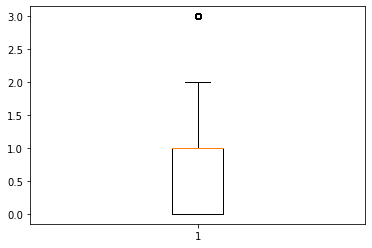

In [76]:
plt.boxplot(skipped_df['skip'])
plt.show()

In [77]:



# deal context switch separately

# pauses before play vs 

# hour of the day

# context type

In [88]:
def skip_vs_discrete_feat(x_col, premium=1):
    skipped_df[skipped_df['skip'] == 1][x_col].value_counts()
    y0_data = skipped_df[skipped_df['skip'] == 0][skipped_df['premium'] == premium][x_col].value_counts()
    y1_data = skipped_df[skipped_df['skip'] == 1][skipped_df['premium'] == premium][x_col].value_counts()
    y2_data = skipped_df[skipped_df['skip'] == 2][skipped_df['premium'] == premium][x_col].value_counts()
    y3_data = skipped_df[skipped_df['skip'] == 3][skipped_df['premium'] == premium][x_col].value_counts()
    return y0_data.sort_index(), y1_data.sort_index(), y2_data.sort_index(), y3_data.sort_index()

def plot_discrete_feat(y0_data, y1_data, y2_data, y3_data, x_col, title):
    fig = plt.figure()
    plt.plot(y0_data.index, y0_data.values)
    plt.plot(y1_data.index, y1_data.values)
    plt.plot(y2_data.index, y2_data.values)
    plt.plot(y3_data.index, y3_data.values)
    plt.xlabel(x_col)
    plt.ylabel('frequency')
    plt.legend(['not skipped', 'skipped very briefly','skipped briefly','mostly played'])
    plt.title(title)
    return fig


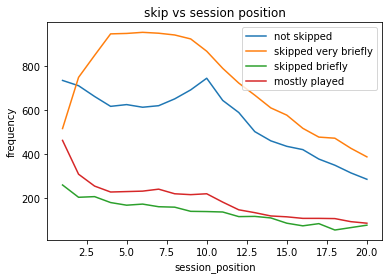

In [89]:
x_col = 'session_position'
y0_data, y1_data, y2_data, y3_data = skip_vs_discrete_feat(x_col=x_col, premium=0)
p = plot_discrete_feat(y0_data, y1_data, y2_data, y3_data, x_col, 'skip vs session position')
plt.show()

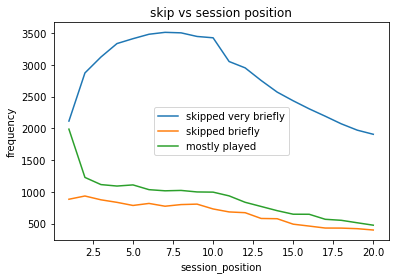

In [80]:
x_col = 'session_position'
y1_data, y2_data, y3_data = skip_vs_discrete_feat(x_col=x_col)
p = plot_discrete_feat(y1_data, y2_data, y3_data, x_col, 'skip vs session position')
plt.show()

In [81]:
skipped_df.premium.value_counts()

True     136053
False     31827
Name: premium, dtype: int64

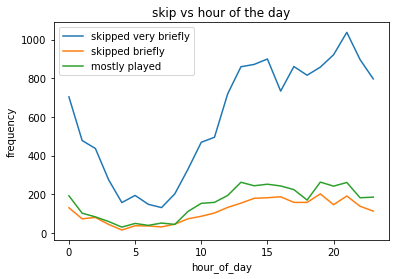

In [82]:
x_col = 'hour_of_day'
y1_data, y2_data, y3_data = skip_vs_discrete_feat(x_col=x_col, premium=0)
p = plot_discrete_feat(y1_data, y2_data, y3_data, x_col, 'skip vs hour of the day')
plt.show()

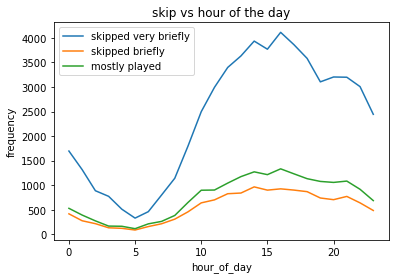

In [83]:
x_col = 'hour_of_day'
y1_data, y2_data, y3_data = skip_vs_discrete_feat(x_col=x_col)
p = plot_discrete_feat(y1_data, y2_data, y3_data, x_col, 'skip vs hour of the day')
plt.show()

In [ ]:
x_col = 'session_position'
y1_data, y2_data, y3_data = skip_vs_discrete_feat(x_col=x_col)
p = plot_discrete_feat(y1_data, y2_data, y3_data, x_col, 'skip vs session position')
plt.show()

In [ ]:
skipped_df.to_csv('../../data/session-df-ak.csv')

In [93]:
skipped_df['custom_skip'].value_counts()

1    108851
0     59029
Name: custom_skip, dtype: int64

In [95]:
def skip_vs_discrete_feat1(x_col, premium=1):
    y0_data = skipped_df[skipped_df['custom_skip'] == 0][skipped_df['premium'] == premium][x_col].value_counts()
    y1_data = skipped_df[skipped_df['custom_skip'] == 1][skipped_df['premium'] == premium][x_col].value_counts()
    return y0_data.sort_index(), y1_data.sort_index()

def plot_discrete_feat1(y0_data, y1_data, x_col, title):
    fig = plt.figure()
    plt.plot(y0_data.index, y0_data.values)
    plt.plot(y1_data.index, y1_data.values)
    plt.xlabel(x_col)
    plt.ylabel('frequency')
    plt.legend(['not skipped', 'skipped'])
    plt.title(title)
    return fig

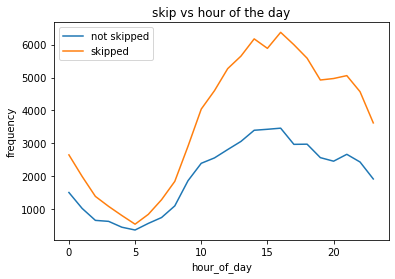

In [96]:
x_col = 'hour_of_day'
y1_data, y2_data = skip_vs_discrete_feat1(x_col=x_col)
p = plot_discrete_feat1(y1_data, y2_data, x_col, 'skip vs hour of the day')
plt.show()

In [97]:
skipped_df.to_csv('../../data/session-df-ak.csv')